In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.metrics import fbeta_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsClassifier   
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor

#import helper methods
from train_helpers import *
from plot_metrics import *

In [98]:
#files on disk
scores_file_train = 'avec_training.csv'
scores_file_dev = 'avec_development.csv'

vector_file_raw_train = 'X_train_raw_doc2vec.npy'
vector_file_raw_dev = 'X_dev_raw_doc2vec.npy'

vector_file_i_train = 'X_train_i_doc2vec.npy'
vector_file_i_dev = 'X_dev_i_doc2vec.npy'
vector_file_i_test = 'X_test_i_doc2vec.npy'

#load in testing features file so that we can use the participant number column
features_test = 'features_test.csv'

#load files
df_train = pd.read_csv(scores_file_train, index_col=0)
df_dev = pd.read_csv(scores_file_dev, index_col=0)

df_test = pd.read_csv(features_test, delimiter='\t', index_col=0)

Xrt = np.load(vector_file_raw_train)
Xrd = np.load(vector_file_raw_dev)

Xit = np.load(vector_file_i_train)
Xid = np.load(vector_file_i_dev)
Xi_test = np.load(vector_file_i_test)

#define scoring arrays: 
#'b' for binary, 'r' for raw, 'p' for ptsd severity; 't' for train, 'd' for dev
ybt = df_train['PHQ_Binary'].values
yrt = df_train['PHQ_Score'].values
ypt = df_train['PTSD_Severity'].values

ybd = df_dev['PHQ_Binary'].values
yrd = df_dev['PHQ_Score'].values
ypd = df_dev['PTSD_Severity'].values

## Training, Classification

Null Hypothesis, H0: there is no difference in the word embeddings created using the transcripts of those who report high feelings of depression and those that don't.

Alternative Hypothesis, H1: There is a difference.

We have already decided to use either the Fbeta score or recall for our purposes. This decision was  made based on trying to reduce our Type 2 errors, where someone identifies as being depressed or scores high on the PHQ8 scale, yet our model misclassifies them. When weighing the other metrics, we think Type 1 errors are more permissable.

### Word Embeddings, Uncleaned Transcripts

In [3]:
#10-fold split
num = 7

#define classifier models
knn = KNeighborsClassifier(n_neighbors=5)
ada = AdaBoostClassifier()
svm = SVC()

In [4]:
accuracy, precision, recall, fbeta, fpr, tpr, ytest, preds = classify_and_report(ada, Xrt, ybt, Xrd, ybd, num)

/home/jakidxav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jakidxav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jakidxav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/home/jakidxav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jakidxav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classifi

Mean accuracy score:  0.6786
Mean precision score:  0.0714
Mean recall score:  0.1905
Mean fbeta score:  0.0796


/home/jakidxav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


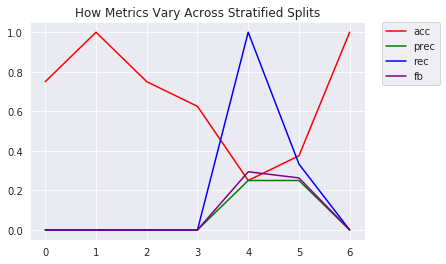

In [5]:
plot_metrics_binary(accuracy, precision, recall, fbeta)

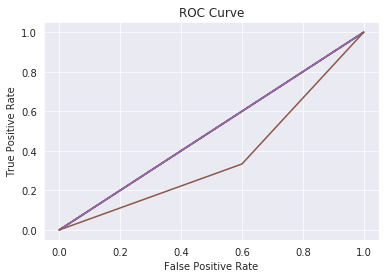

In [6]:
plot_roc(fpr, tpr)

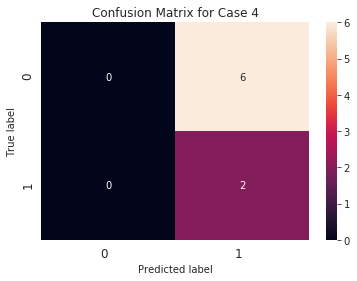

In [10]:
plot_cm(ytest, preds, 4)

### Word Embeddings, Cleaned Transcripts

The raw data is not helping the model learn well. While that was also the case for the last iteration of the DAIC-WOZ dataset, classification yielded poor results in general. Still, we can quickly test if the cleaned data makes any difference in performance.

In [20]:
accuracy, precision, recall, fbeta, fpr, tpr, ytest, preds = classify_and_report(ada, Xit, ybt, Xid, ybd, num)

/home/jakidxav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/home/jakidxav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jakidxav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jakidxav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jakidxav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classifi

Mean accuracy score:  0.7143
Mean precision score:  0.1173
Mean recall score:  0.2857
Mean fbeta score:  0.1313


/home/jakidxav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/jakidxav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/jakidxav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


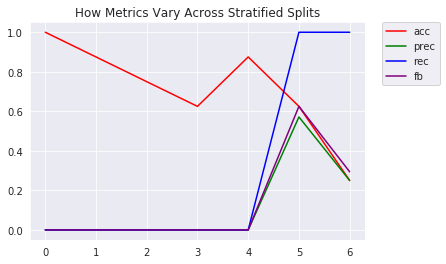

In [21]:
plot_metrics_binary(accuracy, precision, recall, fbeta)

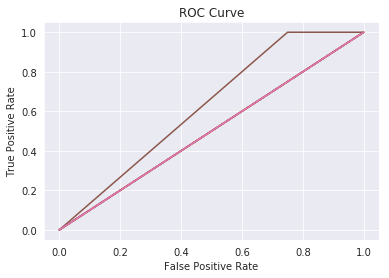

In [22]:
plot_roc(fpr, tpr)

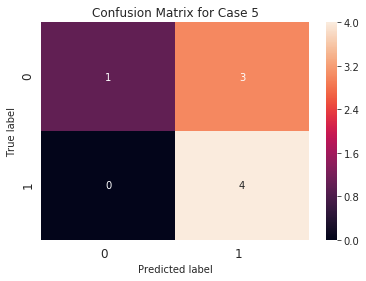

In [23]:
plot_cm(ytest, preds, 5)

There is a marked increase in precision, recall, and fbeta score when using the cleaned data. The model does seem to be predicting when people have depression, but only in 1 out of 7 cases as can be seen by the ROC curve and metrics-across-splits graph. Also, the SVC and KNN models do not do as well as the AdaBoost model.

## Training, Regression

### Word Embeddings, Uncleaned Transcripts

In [24]:
#define regression models
lr = LinearRegression()
sgd = SGDRegressor(max_iter=100, tol=1e-3)
forest = RandomForestRegressor(n_estimators=10)
ridge = Ridge()

In [33]:
rmse, r2, ytest, preds = regress_and_report(forest, Xrt, yrt, Xrd, yrd, num)

Mean rmse score:  6.1617
Mean r2 score:  -0.4276


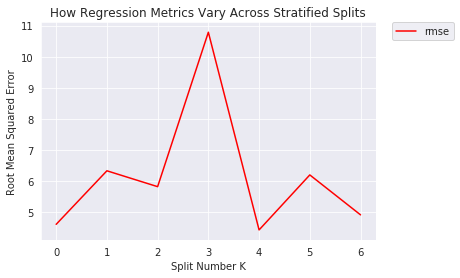

In [34]:
plot_metrics_regress(rmse)

#plt.savefig('metrics_regression_ridge.pdf', format='pdf', bbox_inches='tight')

In [35]:
print(ytest[5], '\n')
print(preds[5])

[ 0  2 11  6 20  4  2  9] 

[7.3 7.3 5.5 7.3 7.1 7.3 5.8 7.3]


### Word Embeddings, Cleaned Transcripts

In [102]:
rmse, r2, ytest, preds = regress_and_report(ridge, Xit, yrt, Xid, yrd, num)

Mean rmse score:  6.259
Mean r2 score:  -0.4121


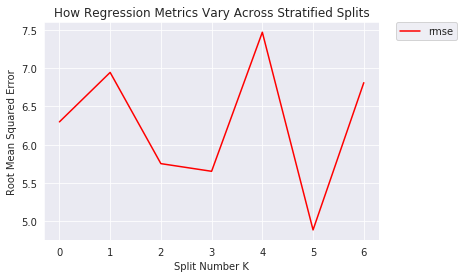

In [103]:
plot_metrics_regress(rmse)

In [104]:
print(ytest[5], '\n')
print(preds[5])

[12  3  5  0  1  9  1  2] 

[7.3374834 7.4230633 6.841907  7.427958  7.11625   7.065416  6.810379
 6.045128 ]


On a scoring system between 0-24, getting as low as 4.5 points away is not bad. These questions remain: can we reduce this error closer to zero, and where does the error take place (are we correctly classifying those with scores >= 15 more often than not?)? As we can see from the printout above, our model is outputting mainly the same number every time (in that specific case), which is not ideal. However, a neural network may be able to reduce this error through training although I have reservations about overfitting given the different distributions in the training, development, and test sets.

Changing from the PHQ8 score to the PTSD severity metric has no effect on performance. The model is unable to generalize to the development set.

In [94]:
#we can predict on the testing set here
test_preds = ridge.predict(Xi_test)

#save predictions to dataframe for easy CSV saving
df_preds = pd.DataFrame({'Participant_ID':df_test['id'],
                         'PHQ_Score':test_preds})

df_preds.to_csv('avec2019_predictions.csv', index=False)